<a href="https://colab.research.google.com/github/Nicolasdaaza/prueba/blob/main/Copy_of_AstrophysicsCMBCorrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

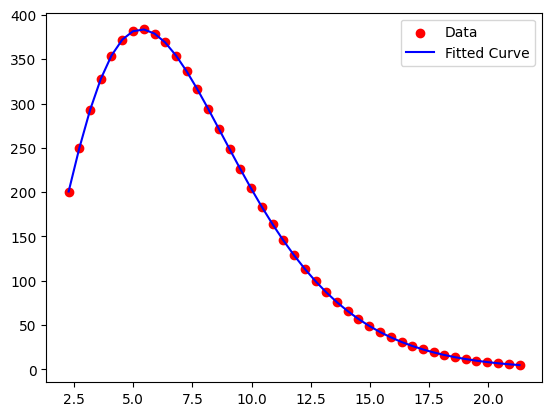

In [ ]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np
data = np.loadtxt('CMB.FIFAS.DATA.txt', comments='#', dtype=float)


xdata = data[:, 0]
ydata = data[:, 1]
residual = data[:, 2]
uncertainty = data[:, 3]
galaxy_model = data[:, 4]

def plancklaw(x,a,b):
  sradiance=a*(x**3)/(np.exp(b*(x))-1)
  return sradiance



params, covariance = curve_fit(plancklaw, xdata, ydata)

plt.scatter(xdata, ydata, label="Data", color="red")
plt.plot(xdata, plancklaw(xdata, *params), label="Fitted Curve", color="blue")

plt.legend("")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

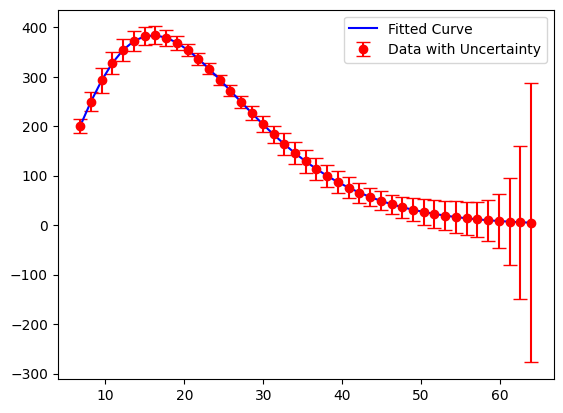

[1.47458049 0.176121  ]


In [ ]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

data = np.loadtxt('CMB.FIFAS.DATA.txt', comments='#', dtype=float)

xdata = data[:, 0]*2.9979
10

ydata = data[:, 1]
residual = data[:, 2]
uncertainty = data[:, 3]
galaxy_model = data[:, 4]

def plancklaw(x, a, b):
    sradiance = a * (x**3) / (np.exp(b * (x)) - 1)
    return sradiance

params, covariance = curve_fit(plancklaw, xdata, ydata)

plt.errorbar(xdata, ydata, yerr=uncertainty, fmt='o', label="Data with Uncertainty", color="red", capsize=5)
plt.plot(xdata, plancklaw(xdata, *params), label="Fitted Curve", color="blue")

plt.legend()
plt.show()
print(params)

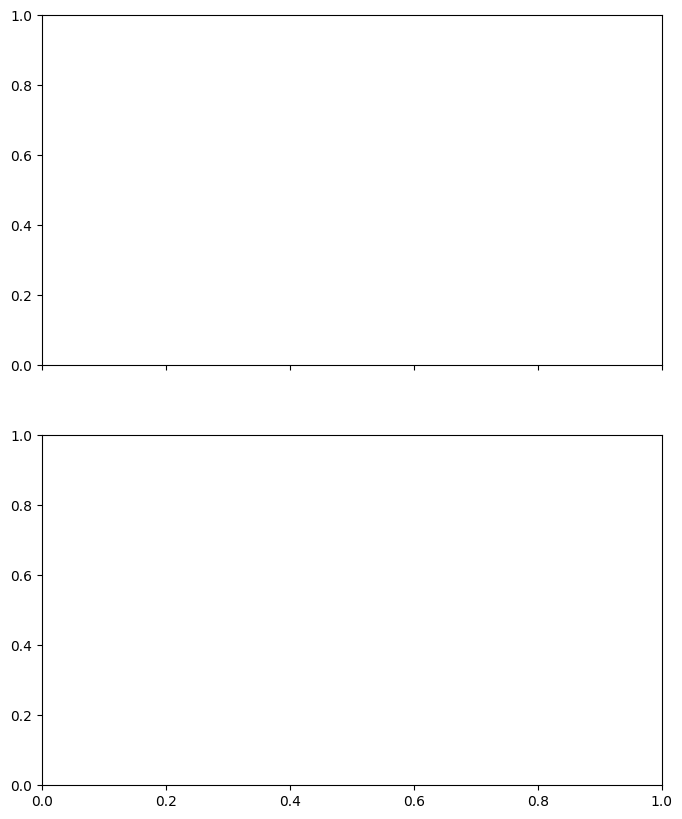

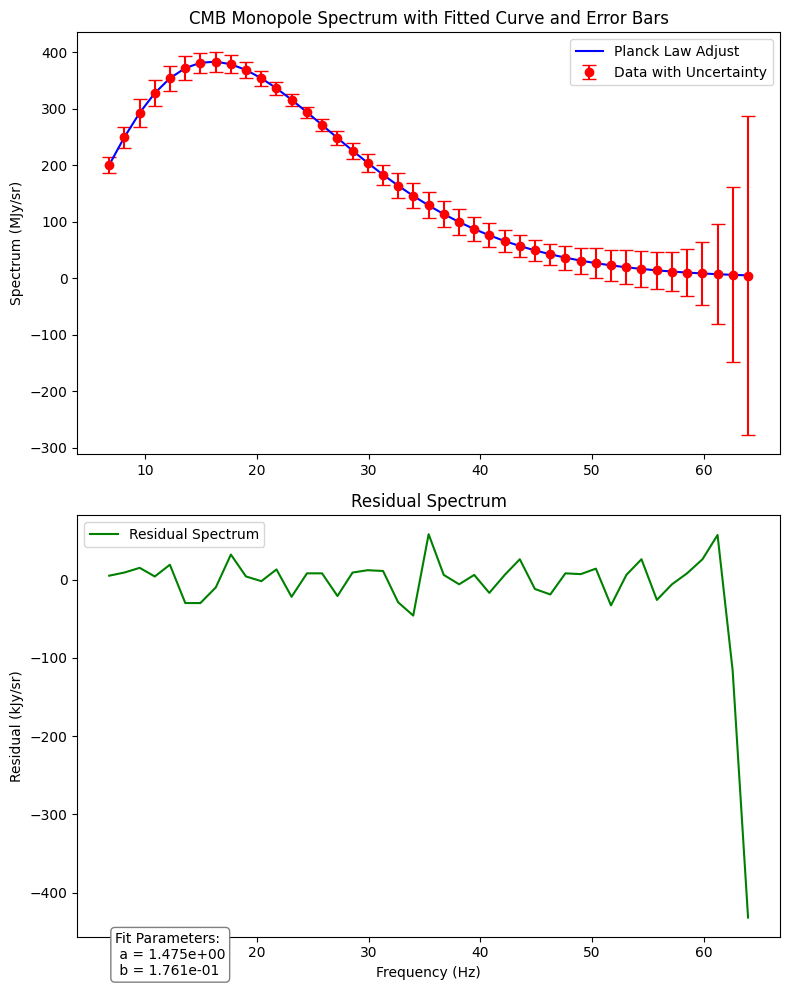

Fit parameters: [1.47458049 0.176121  ]


In [ ]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

data = np.loadtxt('CMB.FIFAS.DATA.txt', comments='#', dtype=float)

xdata = data[:, 0]*2.9979 #correction factor for cm^-1
ydata = data[:, 1]
residual = data[:, 2]
uncertainty = data[:, 3]
galaxy_model = data[:, 4]

def plancklaw(x, a, b):
    sradiance = a * (x**3) / (np.exp(b * (x)) - 1)
    return sradiance

params, covariance = curve_fit(plancklaw, xdata, ydata)

fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

axs[0].errorbar(xdata, ydata, yerr=uncertainty, fmt='o', label="Data with Uncertainty", color="red", capsize=5)
axs[0].plot(xdata, plancklaw(xdata, *params), label="Planck Law Adjust", color="blue")
axs[0].set_ylabel('Spectrum (MJy/sr)')
axs[0].set_title('CMB Monopole Spectrum with Fitted Curve and Error Bars')
axs[0].legend()

axs[1].plot(xdata, residual, label="Residual Spectrum", color="green")
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Residual (kJy/sr)')
axs[1].set_title('Residual Spectrum')
axs[1].legend()
fit_params_text = f"Fit Parameters:\n a = {params[0]:.3e}\n b = {params[1]:.3e}"
plt.figtext(0.15, 0.02, fit_params_text, fontsize=10, ha="left", bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

plt.tight_layout()
plt.savefig("AstroPhysics_Results_CMB.png")
plt.show()

print("Fit parameters:", params)


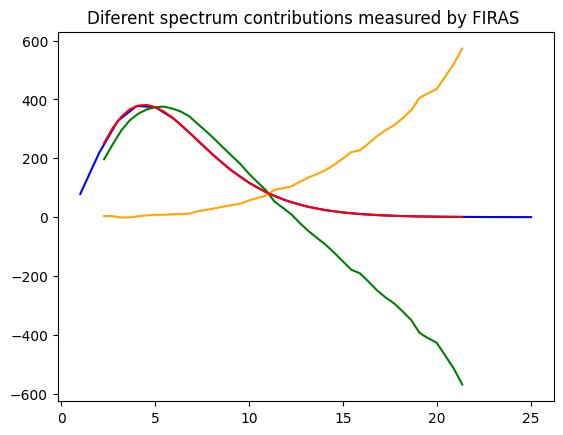

[70.93563706  0.64165494]


In [ ]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np
data = np.loadtxt('CMB.FIFAS.DATA.txt', comments='#', dtype=float)

xdata = data[:, 0]
ydata = data[:, 1]
residual = data[:, 2]
uncertainty = data[:, 3]
galaxy_model = data[:, 4]
params, covariance = curve_fit(plancklaw, xdata, ydata-galaxy_model)
def planck_law(x,a,b):
    sradiance = a * (x**3) / (np.exp(b * (x)) - 1)
    return sradiance
xvalues=[]
yvalues=[]
for i in range(1,26):
  xvalues.append(i)
  yvalues.append(planck_law(xvalues[i-1],params[0],params[1]))

plt.plot(xvalues,yvalues,label='Monopole Spectrum ', color="blue")
plt.plot(xdata,ydata-galaxy_model,label='Bolometric Corrected curve',color="green")
plt.plot(xdata,galaxy_model,label="Modeled Galaxy spectrum at the Galactic poles",color="orange")
plt.title('Diferent spectrum contributions measured by FIRAS ')
params, covariance = curve_fit(plancklaw, xdata, ydata-galaxy_model)
plt.plot(xdata, plancklaw(xdata, *params),label="Fitted Curve", color="red")

plt.show()
print(params)

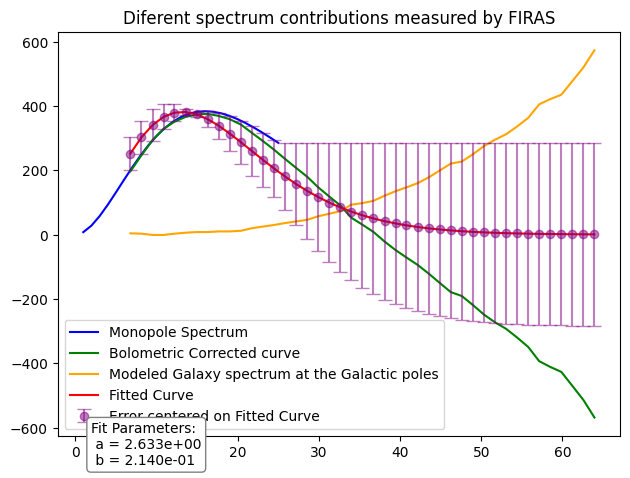

[2.63283352 0.21403623]


In [ ]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

# Load data
data = np.loadtxt('CMB.FIFAS.DATA.txt', comments='#', dtype=float)
xdata = data[:, 0]*2.9979 #correction factor for cm^-1
ydata = data[:, 1]
residual = data[:, 2]
uncertainty = data[:, 3]
galaxy_model = data[:, 4]

params, covariance = curve_fit(planck_law, xdata, ydata)

def planck_law(x, a, b):
    sradiance = a * (x**3) / (np.exp(b * x) - 1)
    return sradiance

xvalues = []
yvalues = []
for i in range(1, 26):
    xvalues.append(i)
    yvalues.append(planck_law(xvalues[i-1], params[0], params[1]))

plt.plot(xvalues, yvalues, label='Monopole Spectrum ', color="blue")
plt.plot(xdata, ydata - galaxy_model, label='Bolometric Corrected curve', color="green")
plt.plot(xdata, galaxy_model, label="Modeled Galaxy spectrum at the Galactic poles", color="orange")
plt.title('Diferent spectrum contributions measured by FIRAS')
params, covariance = curve_fit(planck_law, xdata, ydata - galaxy_model)
plt.plot(xdata, planck_law(xdata, *params), label="Fitted Curve", color="red")
# Calculate the errorbar
adjusted_monopole = np.interp(xdata, xvalues, yvalues)  # Interpolate Monopole Spectrum to match xdata
difference = adjusted_monopole - planck_law(xdata, *params)  # Difference between the two curves
propagated_uncertainty = np.abs(difference)  # Use the absolute value of the differences as uncertainties

# Errorbar centered on the red curve
plt.errorbar(xdata, planck_law(xdata, *params), yerr=propagated_uncertainty, fmt='o', color="purple", label="Error centered on Fitted Curve", capsize=5, alpha=0.5)

plt.legend()
plt.tight_layout()
fit_params_text = f"Fit Parameters:\n a = {params[0]:.3e}\n b = {params[1]:.3e}"
plt.figtext(0.15, 0.02, fit_params_text, fontsize=10, ha="left", bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))
plt.savefig("AstroPhysics_Results_CMB22.png")
plt.show()

print(params)



In [ ]:
h=6.62607015e-34
kb=1.380649e-23
def tempSB(a,h,kb):
  b=1/a
  return b*h/kb
print(tempSB(0.21403623 ,h,kb))


2.2422573380993586e-10


In [ ]:
import numpy as np
def ajuste (a):
  b=(a*3*3*3)/(8*np.pi)
  return b
print(ajuste(2.63283352))

2.8284421660607326


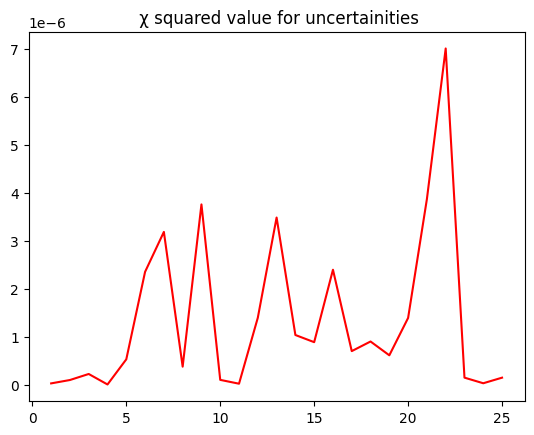

In [ ]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

data = np.loadtxt('CMB.FIFAS.DATA.txt', comments='#', dtype=float)
xdata = data[:, 0]*2.9979 #correction factor for cm^-1
ydata = data[:, 1]
residual = data[:, 2]
uncertainty = data[:, 3]
galaxy_model = data[:, 4]

def planck_law(x, a, b):
    sradiance = a * (x**3) / (np.exp(b * x) - 1)
    return sradiance

xvalues = []
yvalues = []

chisquared=[]
for i in range(1, 26):
    xvalues.append(i)
    yvalues.append(planck_law(xvalues[i-1], params[0], params[1]))
    chisquared.append(((ydata[i-1]-planck_law(xdata[i-1], params[0], params[1]))/uncertainty[i-1])**2)
params, covariance = curve_fit(planck_law, xdata, ydata)
plt.plot(xvalues,chisquared,label="X^2",color="red")
plt.title(' χ squared value for uncertainities')
plt.savefig("X2")